## 加载数据集

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 31s 2us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
#由于限定为前10 000个最常出现的单词，因此单词索引都不会超过10 000。
max([max(sequence) for sequence in train_data])

9999

In [6]:
# 将评论解码为文本
word_index = imdb.get_word_index()  # word_index是一个将单词映射为整数索引的字典
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])  # 将字典的键和值交换，将整数索引映射为单词
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])  # 对评论解码。注意，索引减去了3，因为0、1、2分别是为“padding”（填充）、“start of sequence”（序列开始）、“unknown”（未知词）保留的索引

1641221/1641221 [==============================] - 1s 1us/step


In [29]:
decoded_review 

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [20]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## 准备数据

In [12]:
# 用multi-hot编码对整数序列进行编码
import numpy as np
def vectorze_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 创建一个形状为(len(sequences), dimension)的零矩阵
    for i,sequences in enumerate(sequences):
        for j in sequences:
            results[i, j] = 1. 
    return results
            
x_train = vectorze_sequences(train_data)
x_test = vectorze_sequences(test_data)

In [14]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


## 构建模型

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2023-01-11 17:03:04.939197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# 编译模型
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [21]:
# 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
# 训练模型
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5482 - accuracy: 0.7907 - val_loss: 0.4289 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3444 - accuracy: 0.9003 - val_loss: 0.3410 - val_accuracy: 0.8732
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2536 - accuracy: 0.9243 - val_loss: 0.2932 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1991 - accuracy: 0.9374 - val_loss: 0.2742 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1611 - accuracy: 0.9500 - val_loss: 0.2728 - val_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1335 - accuracy: 0.9600 - val_loss: 0.3099 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1121 - accuracy: 0.9666 - val_loss: 0.2908 - val_accuracy: 0.8857
Epoch 8/20
30

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

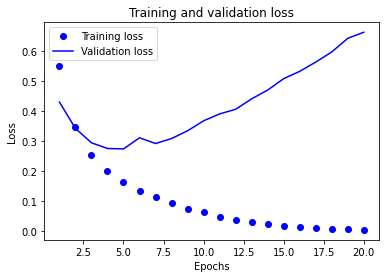

In [24]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")  #"bo"表示“蓝色圆点”
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  # "b"表示“蓝色实线”
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

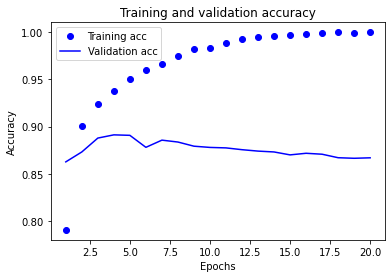

In [25]:
plt.clf()  #清空图像
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
# 从头开始训练一个模型
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_train, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4488 - accuracy: 0.8179
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2541 - accuracy: 0.9120
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1957 - accuracy: 0.9282
Epoch 4/4
782/782 [==============================] - 1s 943us/step - loss: 2.1801 - accuracy: 0.4965


## 利用训练好的模型对新数据进行预测

In [28]:
model.predict(x_test)

782/782 [==============================] - 1s 811us/step


array([[0.17849635],
       [0.9996879 ],
       [0.82139933],
       ...,
       [0.09564316],
       [0.05763997],
       [0.6413786 ]], dtype=float32)